In [2]:
import os
import sys
import tensorflow as tf

directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from NsgaII import Nsga_II
from utils.load_data import load_mnist
from CapsNet import CapsNet

(X_train, y_train), (X_test , y_test) = load_mnist(size=(5000, 3000))

In [3]:
import json
with open('../saved_ga/mnist-gpu0-hpc-2/solutions.json') as file:
    solutions = json.load(file)
    params = solutions['Solution 2']['params']

# params = {'epochs': 5, 'r': 2, 'no_of_conv_kernels': 64, 'secondary_capsule_vector': 6, 'dense_1': 256, 'dense_2': 512, 'epsilon': 0.08411185848750914, 'm_plus': 0.9504174153527706, 'm_minus': 0.1648052052496743, 'lambda_': 0.6831030565866469, 'alpha': 0.006858184909559632, 'no_of_primary_capsules': 32, 'primary_capsule_vector': 8, 'no_of_secondary_capsules': 10}

print(params)
NasCapsNet = CapsNet(**params)
NasCapsNet._name = 'NasCapsNet'
NasCapsNet.compile()
NasCapsNet.summary()

{'epochs': 5, 'r': 2, 'no_of_conv_kernels': 64, 'secondary_capsule_vector': 6, 'dense_1': 256, 'dense_2': 512, 'epsilon': 0.08411185848750914, 'm_plus': 0.9504174153527706, 'm_minus': 0.1648052052496743, 'lambda_': 0.6831030565866469, 'alpha': 0.006858184909559632, 'no_of_primary_capsules': 32, 'primary_capsule_vector': 8, 'no_of_secondary_capsules': 10}
Model: "NasCapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense (Dense)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                             

In [4]:
NasCapsNet.fit(X_train, y_train, tf.keras.optimizers.legacy.Adam(), train_metrics=['accuracy'], validation=(X_test, y_test))

Epoch 1/5: 100%|██████████| 79/79 [00:17<00:00,  4.24it/s, Evaluating ...]

In [ ]:
n_rounds = 100

import time

caps_nas_inv_time = []
for i in range(n_rounds):
    start = time.time()
    NasCapsNet.predict(X_test)
    end = time.time()
    caps_nas_inv_time.append((end - start) / len(X_test) * 1000)
caps_nas_inv_time

[0.5343244075775146,
 0.5138996442159017,
 0.5360643863677979,
 0.5238393147786459,
 0.5472773710886637,
 0.5146426359812419,
 0.5486586888631185,
 0.5212023258209229,
 0.5200072924296061,
 0.5158553123474121,
 0.5126767158508301,
 0.5147918860117594,
 0.5037816365559896,
 0.5118619600931804,
 0.5360370477040609,
 0.5476849873860677,
 0.5159576733907064,
 0.5036640961964926,
 0.5039929548899332,
 0.5123006502787272,
 0.5208914279937744,
 0.5072879791259766,
 0.5095210075378418,
 0.5088423887888591,
 0.5255602995554606,
 0.5222172737121582,
 0.5080973307291667,
 0.5070149898529053,
 0.5083847045898438,
 0.5026869773864746,
 0.5088187058766683,
 0.513404369354248,
 0.5126356283823649,
 0.5070123672485352,
 0.5173479715983073,
 0.5533059438069661,
 0.5205485820770264,
 0.5089950561523438,
 0.5070463021596273,
 0.5071587562561035,
 0.5080846945444742,
 0.5089503924051921,
 0.5114513238271077,
 0.5161809921264648,
 0.5013880729675293,
 0.5269543329874674,
 0.5061716238657633,
 0.50787862141

In [ ]:
import numpy as np
np.mean(caps_nas_inv_time)

NameError: name 'caps_nas_inv_time' is not defined

In [ ]:
params = {
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
    "dense_1": 512,
    "dense_2": 1024
}

{
    'epochs': 5, 
    'r': 2,
    'no_of_conv_kernels': 64,
    'secondary_capsule_vector': 6,
    'dense_1': 256,
    'dense_2': 512,
    'epsilon': 0.08411185848750914,
    'm_plus': 0.9504174153527706,
    'm_minus': 0.1648052052496743,
    'lambda_': 0.6831030565866469,
    'alpha': 0.006858184909559632,
    'no_of_primary_capsules': 32,
    'primary_capsule_vector': 8,
    'no_of_secondary_capsules': 10}


BaselineCapsNetModel = CapsNet(**params)
BaselineCapsNetModel._name = 'BaselineCapsNetModel'
BaselineCapsNetModel.compile()
BaselineCapsNetModel.summary()

Model: "BaselineCapsNetModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense_78 (Dense)            multiple                  0 (unused)
                                                                 
 dense_79 (Dense)            multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [ ]:
BaselineCapsNetModel.fit(X_train, y_train, tf.keras.optimizers.legacy.Adam(), train_metrics=['accuracy'], validation=(X_test, y_test))

Epoch 10/10: 100%|██████████| 79/79 [00:25<00:00,  3.07it/s]

Validation loss is not decreasing anymore, risk of overfitting the model after 10 epochs. The training will be stopped. This behavior can be modified by setting the early_stop property of the model to False


{'accuracy': ListWrapper([0.9536, 0.98, 0.987, 0.9918, 0.995, 0.996, 0.9978, 0.9982, 0.9988]),
 'loss': ListWrapper([0.3097932320088148, 0.08321264176629484, 0.05534231895580888, 0.04158261290285736, 0.03326999139972031, 0.02466839214321226, 0.019344296015333384, 0.014004786498844624, 0.011827819253085181]),
 'val_accuracy': ListWrapper([0.9276666666666666, 0.958, 0.9623333333333334, 0.9626666666666667, 0.9653333333333334, 0.962, 0.9683333333333334, 0.9646666666666667, 0.965]),
 'val_loss': ListWrapper([0.14193583047017455, 0.092715909704566, 0.07689831545576453, 0.07316996343433857, 0.06711899186484516, 0.06371272029355168, 0.05823915125802159, 0.05616775597445667, 0.05149357602931559])}

In [ ]:
n_rounds = 100

import time

caps_inv_time = []
for i in range(n_rounds):
    start = time.time()
    BaselineCapsNetModel.predict(X_test)
    end = time.time()
    caps_inv_time.append((end - start) / len(X_test) * 1000)

In [ ]:
caps_inv_time

[1.0393946170806885,
 1.0283239682515461,
 1.0550883611043294,
 1.0988659063975017,
 1.0264192422231038,
 1.100140412648519,
 1.0813806851704917,
 1.0651217301686604,
 1.0524499416351318,
 0.9940913518269856,
 1.0145200093587239,
 1.0021309852600098,
 0.9839523633321127,
 1.015681266784668,
 0.9791723092397054,
 0.9907997449239095,
 0.9825679461161296,
 0.9778046607971191,
 0.9923053582509358,
 1.0264449914296467,
 1.001984675725301,
 1.0094300111134846,
 1.0115636984507244,
 1.0027116139729817,
 1.0275713602701824,
 1.0016830762227378,
 1.0724349816640217,
 1.0217309792836506,
 0.9822803338368734,
 1.0785853068033855,
 1.1656906604766846,
 1.0498662789662678,
 1.010831356048584,
 1.016911268234253,
 1.0540376504262288,
 1.046073039372762,
 1.0197726885477703,
 1.0046809514363606,
 0.9990020593007405,
 1.0491960048675537,
 1.0432476202646892,
 1.0331149895985923,
 1.0465116500854492,
 1.0288807551066081,
 1.0601986249287922,
 1.0378170013427734,
 1.049253225326538,
 1.061629295349121,


In [ ]:
import numpy as np

np.mean(caps_inv_time)

1.0309759179751077

In [ ]:
ConvNetModel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
ConvNetModel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_80 (Dense)            (None, 100)               540900    
                                                                 
 dense_81 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [ ]:
ConvNetModel.compile(tf.optimizers.legacy.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
tf_y_train = tf.keras.utils.to_categorical(y_train)
tf_y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
history = ConvNetModel.fit(X_train, tf_y_train, epochs=10, batch_size=32, validation_data=(X_test, tf_y_test))

Epoch 1/10
157/157 [==============================] - 1s 6ms/step - loss: 0.5257 - accuracy: 0.8484 - val_loss: 0.3587 - val_accuracy: 0.8927
Epoch 2/10
157/157 [==============================] - 1s 5ms/step - loss: 0.1745 - accuracy: 0.9498 - val_loss: 0.2168 - val_accuracy: 0.9340
Epoch 3/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0983 - accuracy: 0.9716 - val_loss: 0.1811 - val_accuracy: 0.9443
Epoch 4/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0651 - accuracy: 0.9826 - val_loss: 0.1869 - val_accuracy: 0.9437
Epoch 5/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.1454 - val_accuracy: 0.9563
Epoch 6/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0239 - accuracy: 0.9948 - val_loss: 0.1601 - val_accuracy: 0.9483
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0194 - accuracy: 0.9950 - val_loss: 0.1619 - val_accuracy: 0.9507
Epoch 

In [ ]:
history.history

NameError: name 'history' is not defined

In [ ]:
n_rounds = 100

import time

cnn_inv_time = []
for i in range(n_rounds):
    start = time.time()
    ConvNetModel.predict(X_test)
    end = time.time()
    cnn_inv_time.append((end - start) / len(X_test) * 1000)

94/94 [==============================] - 0s 1ms/step


In [ ]:
cnn_inv_time

[0.06803464889526367,
 0.046277920405069985,
 0.04695598284403483,
 0.05083195368448893,
 0.04903904596964518,
 0.04744426409403483,
 0.04295102755228678,
 0.04736463228861491,
 0.04630764325459798,
 0.046906630198160805,
 0.04629206657409668,
 0.04596670468648275,
 0.04629802703857422,
 0.04626234372456868,
 0.04603934288024902,
 0.045617103576660156,
 0.04674998919169108,
 0.04755441347757975,
 0.04634666442871094,
 0.04609974225362142,
 0.04549034436543782,
 0.04554971059163411,
 0.047272682189941406,
 0.04555964469909668,
 0.04728738466898601,
 0.046836932500203446,
 0.04641040166219076,
 0.046520630518595375,
 0.04690408706665039,
 0.047209580739339195,
 0.04745729764302571,
 0.046413977940877274,
 0.04742836952209473,
 0.047348976135253906,
 0.04698999722798665,
 0.047243992487589516,
 0.045872608820597335,
 0.04828000068664551,
 0.04731607437133789,
 0.04755830764770508,
 0.045488039652506515,
 0.047333717346191406,
 0.04707256952921549,
 0.04559572537740072,
 0.0442863305409749

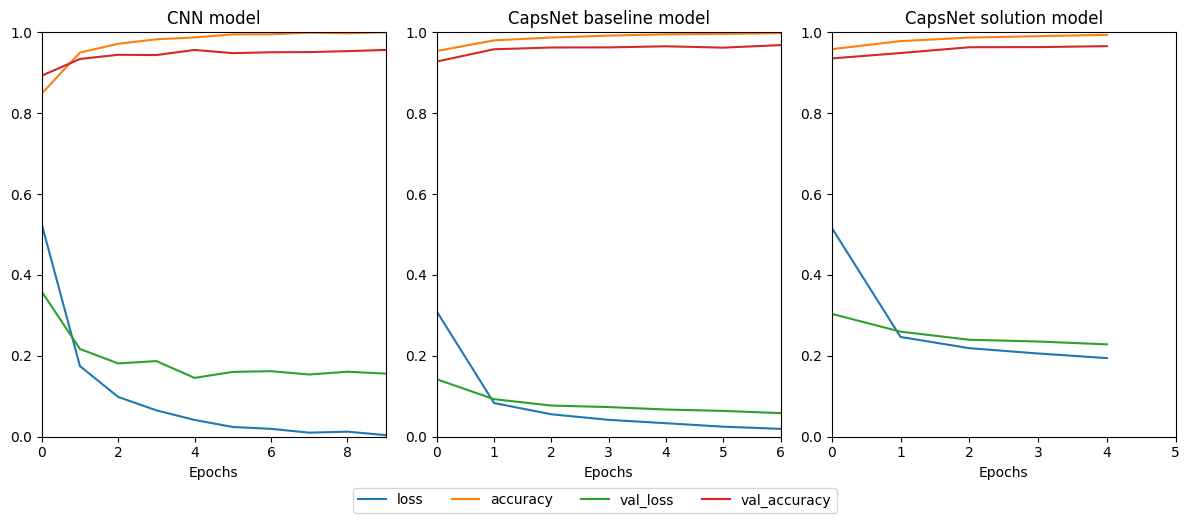

In [ ]:
import matplotlib.pyplot as plt
import time
import pandas as pd

NasCapsNet.training_metrics = {
    'loss': NasCapsNet.training_metrics['loss'],
    'accuracy': NasCapsNet.training_metrics['accuracy'],
    'val_loss': NasCapsNet.training_metrics['val_loss'],
    'val_accuracy': NasCapsNet.training_metrics['val_accuracy'],
}

BaselineCapsNetModel.training_metrics = {
    'loss': BaselineCapsNetModel.training_metrics['loss'],
    'accuracy': BaselineCapsNetModel.training_metrics['accuracy'],
    'val_loss': BaselineCapsNetModel.training_metrics['val_loss'],
    'val_accuracy': BaselineCapsNetModel.training_metrics['val_accuracy'],
}

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

df_baseline = pd.DataFrame(history.history)
plot_baseline = df_baseline.plot(ax=axes[0], title="CNN model", legend=False)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, 9)

df_capsnet = pd.DataFrame(BaselineCapsNetModel.training_metrics)
plot_capsnet = df_capsnet.plot(ax=axes[1], title="CapsNet baseline model", legend=False)  # Set legend=False here
axes[1].set_ylim(0, 1)
axes[1].set_xlim(0, 6)

df_capsnet_nas = pd.DataFrame(NasCapsNet.training_metrics)
plot_capsnet_nas = df_capsnet_nas.plot(ax=axes[2], title="CapsNet solution model", legend=False)  # Set legend=False here
axes[2].set_ylim(0, 1)
axes[2].set_xlim(0, 5)

axes[0].set_xlabel("Epochs")
axes[1].set_xlabel("Epochs")
axes[2].set_xlabel("Epochs")

# Show only one legend for all three plots
handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), fancybox=True, ncol=4)

plt.tight_layout()
plt.show()


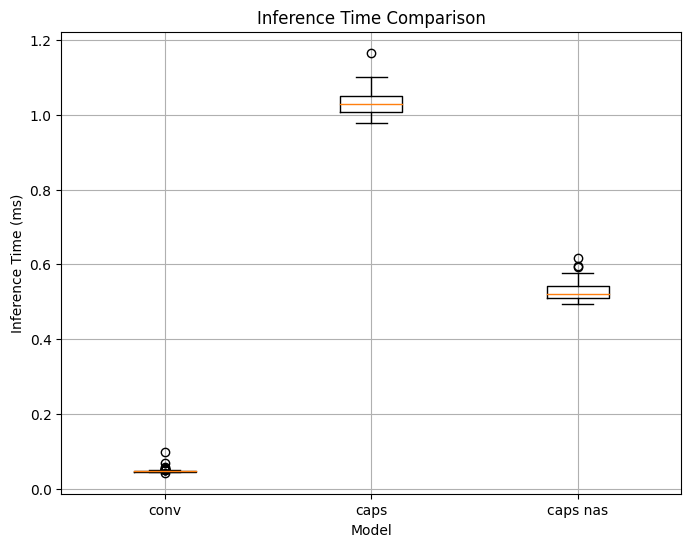

In [ ]:
df = pd.DataFrame({
    "conv": cnn_inv_time,
    "caps": caps_inv_time,
    "caps nas": caps_nas_inv_time
})
plt.figure(figsize=(8, 6))
plt.boxplot(df.values, labels=df.columns)
plt.title('Inference Time Comparison')
plt.xlabel('Model')
plt.ylabel('Inference Time (ms)')
plt.grid(True)
plt.show()

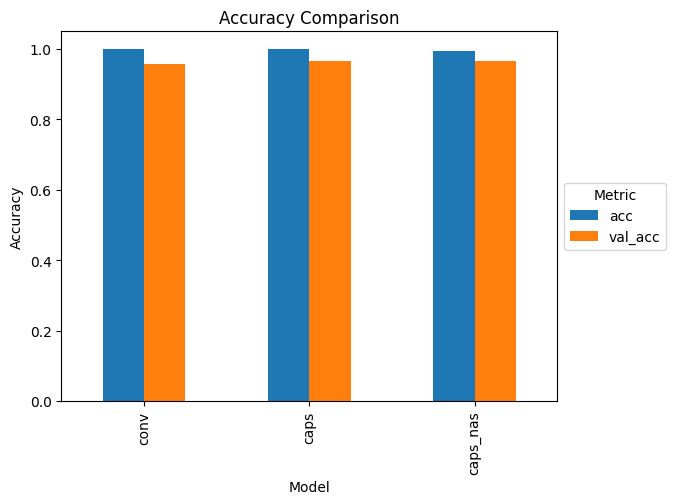

In [ ]:
df = pd.DataFrame({
    'conv': {'acc': history.history['accuracy'][-1], 'val_acc': history.history['val_accuracy'][-1]},
    'caps': {'acc': BaselineCapsNetModel.training_metrics['accuracy'][-1], 'val_acc': BaselineCapsNetModel.training_metrics['val_accuracy'][-1]},
    'caps_nas': {'acc': NasCapsNet.training_metrics['accuracy'][-1], 'val_acc': NasCapsNet.training_metrics['val_accuracy'][-1]},
})

df = df.T
df.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend(title='Metric', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()